In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.usetex = True
from tqdm.notebook import tqdm


In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer


In [3]:
n_samples = 100
data, _ = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'),
                             return_X_y=True,
                            )
data_samples = data[:n_samples]


In [4]:
print(data_samples)

["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n", "\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap 

In [5]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=10000,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(data_samples)


In [6]:
vocabulary = tf_vectorizer.vocabulary_
print(vocabulary)

{'sure': 1039, 'story': 1026, 'did': 327, 'biased': 139, 'disagree': 337, 'israeli': 566, 'world': 1164, 'having': 503, 'europe': 388, 'realize': 870, 'described': 314, 'letter': 606, 'try': 1090, 'ignore': 536, 'degree': 309, 'think': 1066, 'reason': 873, 'report': 898, 'daily': 288, 'reports': 900, 'soldiers': 997, 'government': 480, 'makes': 645, 'away': 121, 'look': 627, 'jews': 572, 'got': 477, 'power': 813, 'yeah': 1171, 'expect': 396, 'people': 772, 'read': 864, 'faq': 415, 'actually': 63, 'accept': 57, 'hard': 502, 'atheism': 109, 'need': 704, 'little': 618, 'faith': 411, 'logic': 625, 'runs': 930, 'jim': 573, 'sorry': 1002, 'feelings': 424, 'oh': 733, 'just': 578, 'end': 375, 'maybe': 660, 'start': 1015, 'new': 709, 'newsgroup': 710, 'alt': 79, 'won': 1156, 'big': 141, 'don': 349, 'forget': 442, 'iii': 538, 'like': 610, 'know': 587, 'ask': 102, 'question': 854, 'sort': 1003, 'want': 1136, 'continue': 263, 'israel': 565, 'stop': 1023, 'asking': 104, 'questions': 855, 'work': 11

In [37]:
docs = []
for row in tf.toarray():
    present_words = np.where(row != 0)[0].tolist()
    present_words_with_count = []
    for word_idx in present_words:
        for count in range(row[word_idx]):
            present_words_with_count.append(word_idx)
    docs.append(present_words_with_count)


In [28]:
print(docs)

[[121, 139, 288, 309, 314, 327, 337, 388, 477, 480, 503, 536, 566, 566, 572, 606, 627, 645, 813, 870, 873, 898, 900, 997, 1026, 1039, 1066, 1090, 1164], [57, 63, 79, 109, 141, 349, 375, 396, 411, 411, 415, 424, 442, 502, 502, 538, 573, 573, 573, 578, 618, 625, 660, 704, 704, 709, 710, 733, 772, 864, 930, 1002, 1002, 1015, 1156, 1171], [102, 104, 112, 122, 133, 139, 191, 263, 414, 488, 565, 565, 565, 572, 587, 610, 610, 627, 798, 854, 855, 870, 870, 903, 1003, 1003, 1015, 1023, 1031, 1066, 1084, 1136, 1161], [3, 3, 95, 101, 110, 177, 196, 221, 221, 222, 273, 283, 335, 347, 353, 375, 386, 403, 421, 475, 477, 479, 480, 495, 580, 604, 613, 647, 680, 709, 768, 778, 779, 816, 823, 824, 829, 835, 840, 847, 854, 867, 1027, 1042, 1052, 1072, 1106, 1107, 1127, 1172, 1174], [194, 196, 346, 349, 366, 378, 476, 599, 605, 605, 621, 641, 659, 709, 794, 808, 861, 916, 927, 1073, 1077, 1101], [90, 294, 297, 475, 571, 718, 735, 864, 1019, 1066, 1139, 1157], [11, 17, 24, 32, 32, 33, 35, 44, 120, 137, 158

In [9]:
D = len(docs)        # number of documents
V = len(vocabulary)  # size of the vocabulary 
T = 10               # number of topics

alpha = 1 / T         # the parameter of the Dirichlet prior on the per-document topic distributions
beta = 1 / T        # the parameter of the Dirichlet prior on the per-topic word distribution


In [19]:
z_d_n = [[0 for _ in range(len(d))] for d in docs]  # z_i_j
theta_d_z = np.zeros((D, T))
phi_z_w = np.zeros((T, V))
n_d = np.zeros((D))
n_z = np.zeros((T))

## Initialize the parameters
# m: doc id
for d, doc in enumerate(docs):  
    # n: id of word inside document, w: id of the word globally
    for n, w in enumerate(doc):
        # assign a topic randomly to words
        z_d_n[d][n] = n % T
        # get the topic for word n in document m
        z = z_d_n[d][n]
        # keep track of our counts
        theta_d_z[d][z] += 1
        phi_z_w[z, w] += 1
        n_z[z] += 1
        n_d[d] += 1

for iteration in tqdm(range(10)):
    for d, doc in enumerate(docs):
        for n, w in enumerate(doc):
            # get the topic for word n in document m
            z = z_d_n[d][n]

            # decrement counts for word w with associated topic z
            theta_d_z[d][z] -= 1
            phi_z_w[z, w] -= 1
            n_z[z] -= 1

            # sample new topic from a multinomial according to our formular
            p_d_t = (theta_d_z[d] + alpha) / (n_d[d] - 1 + T * alpha)
            p_t_w = (phi_z_w[:, w] + beta) / (n_z + V * beta)
            p_z = p_d_t * p_t_w
            p_z /= np.sum(p_z)
            new_z = np.random.multinomial(1, p_z).argmax()

            # set z as the new topic and increment counts
            z_d_n[d][n] = new_z
            theta_d_z[d][new_z] += 1
            phi_z_w[new_z, w] += 1
            n_z[new_z] += 1


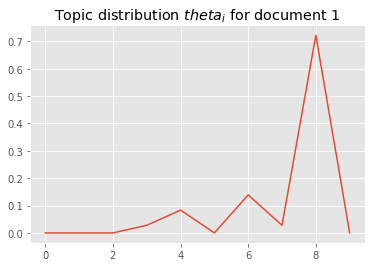

In [20]:
i = 1
plt.plot(theta_d_z[i]/ sum(theta_d_z[i]));
plt.title("Topic distribution $theta_i$ for document {}".format(i));


In [21]:
inv_vocabulary = {v: k for k, v in vocabulary.items()}
n_top_words = 10
for topic_idx, topic in enumerate(phi_z_w):
    message = "Topic #%d: " % topic_idx
    message += " ".join([inv_vocabulary[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    print(message)


Topic #0: key list keys moon days papers message conference 10 new
Topic #1: israel people israeli real time government public internet interested soldiers
Topic #2: way like just really creation things memory force door god
Topic #3: edu mail 3d image objects format package com data stuff
Topic #4: good does know cache say chip like want need don
Topic #5: gm bible john st vs times 20 24 23 17
Topic #6: life day new mm phones ll means vram info repeat
Topic #7: did contact try better cable old peace let case patch
Topic #8: don power just think like work question year control years
Topic #9: 128 send edu line mail help software com computer use
